In [1]:
import pandas as pd

In [32]:
df = pd.read_csv(r'C:\Users\ajayr\OneDrive\Desktop\datasets\yelp.csv',encoding='cp1252')

In [3]:
print(df)

                                                   cmd  score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]


In [5]:
import numpy as np

In [33]:
df.head()

,cmd,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [34]:
df.tail()

,cmd,score
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [38]:
df.groupby('score').count()

,cmd
score,
0,500
1,500


In [39]:
df.dtypes

cmd      object
score     int64
dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cmd     1000 non-null   object
 1   score   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [41]:
# Display the column names of our dataset :
df.columns

Index(['cmd', 'score'], dtype='object')

In [42]:
df.shape

(1000, 2)

In [43]:
#DATA preprocessing
# Selecting the text and Target column for our further analysis :
data = df[['cmd','score']]
# Checking unique Target Values :
data['score'].unique()

array([1, 0], dtype=int64)

In [44]:
# Separating positive and negative reviews :
data_pos = data[data['score'] == 1]
data_neg = data[data['score'] == 0]
# Combining positive and negative reviews :
dataset = pd.concat([data_pos, data_neg])
dataset['cmd'].tail()

995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cmd, dtype: object

In [45]:
# Making statements in lower case :
dataset['cmd'] = dataset['cmd'].str.lower()
dataset['cmd'].tail()

995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: cmd, dtype: object

In [46]:
# Defining set of all stopwords  
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're',
                's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']

In [47]:
import re
import nltk
import sklearn as sl
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# Cleaning and removing the above stop words list from the tweet text :
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['cmd'] = dataset['cmd'].apply(lambda text: cleaning_stopwords(text))
dataset['cmd'].tail()

995                   think food flavor texture lacking.
996                             appetite instantly gone.
997             overall not impressed would not go back.
998    whole experience underwhelming, think we'll go...
999    then, hadn't wasted enough life there, poured ...
Name: cmd, dtype: object

In [49]:
# removing punctuations :
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['cmd'] = dataset['cmd'].apply(lambda x: cleaning_punctuations(x))
dataset['cmd'].tail()

995                    think food flavor texture lacking
996                              appetite instantly gone
997              overall not impressed would not go back
998    whole experience underwhelming think well go n...
999    then hadnt wasted enough life there poured sal...
Name: cmd, dtype: object

In [50]:
# removing repeating characters :
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['cmd'] = dataset['cmd'].apply(lambda x: cleaning_repeating_char(x))
dataset['cmd'].tail()

995                    think food flavor texture lacking
996                              appetite instantly gone
997              overall not impressed would not go back
998    whole experience underwhelming think well go n...
999    then hadnt wasted enough life there poured sal...
Name: cmd, dtype: object

In [51]:
# removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)
dataset['cmd'] = dataset['cmd'].apply(lambda x: cleaning_URLs(x))
dataset['cmd'].tail()

995                    think food flavor texture lacking
996                              appetite instantly gone
997              overall not impressed would not go back
998    whole experience underwhelming think well go n...
999    then hadnt wasted enough life there poured sal...
Name: cmd, dtype: object

In [52]:
# removing numeric numbers :
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['cmd'] = dataset['cmd'].apply(lambda x: cleaning_numbers(x))
dataset['cmd'].tail()

995                    think food flavor texture lacking
996                              appetite instantly gone
997              overall not impressed would not go back
998    whole experience underwhelming think well go n...
999    then hadnt wasted enough life there poured sal...
Name: cmd, dtype: object

In [54]:
# Applying Stemming :
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['cmd'] = dataset['cmd'].apply(lambda x: stemming_on_text(x))
dataset['cmd'].head()

0                                      wow loved place
3    stopped late may bank holiday off rick steve r...
4                          selection menu great prices
8                                      fries great too
9                                          great touch
Name: cmd, dtype: object

In [55]:
# Applying Lemmatizer :
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['cmd'] = dataset['cmd'].apply(lambda x: lemmatizer_on_text(x))
dataset['cmd'].head()

0                                      wow loved place
3    stopped late may bank holiday off rick steve r...
4                          selection menu great prices
8                                      fries great too
9                                          great touch
Name: cmd, dtype: object

In [57]:
# Separating input feature and label :
X = data.cmd
y = data.score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

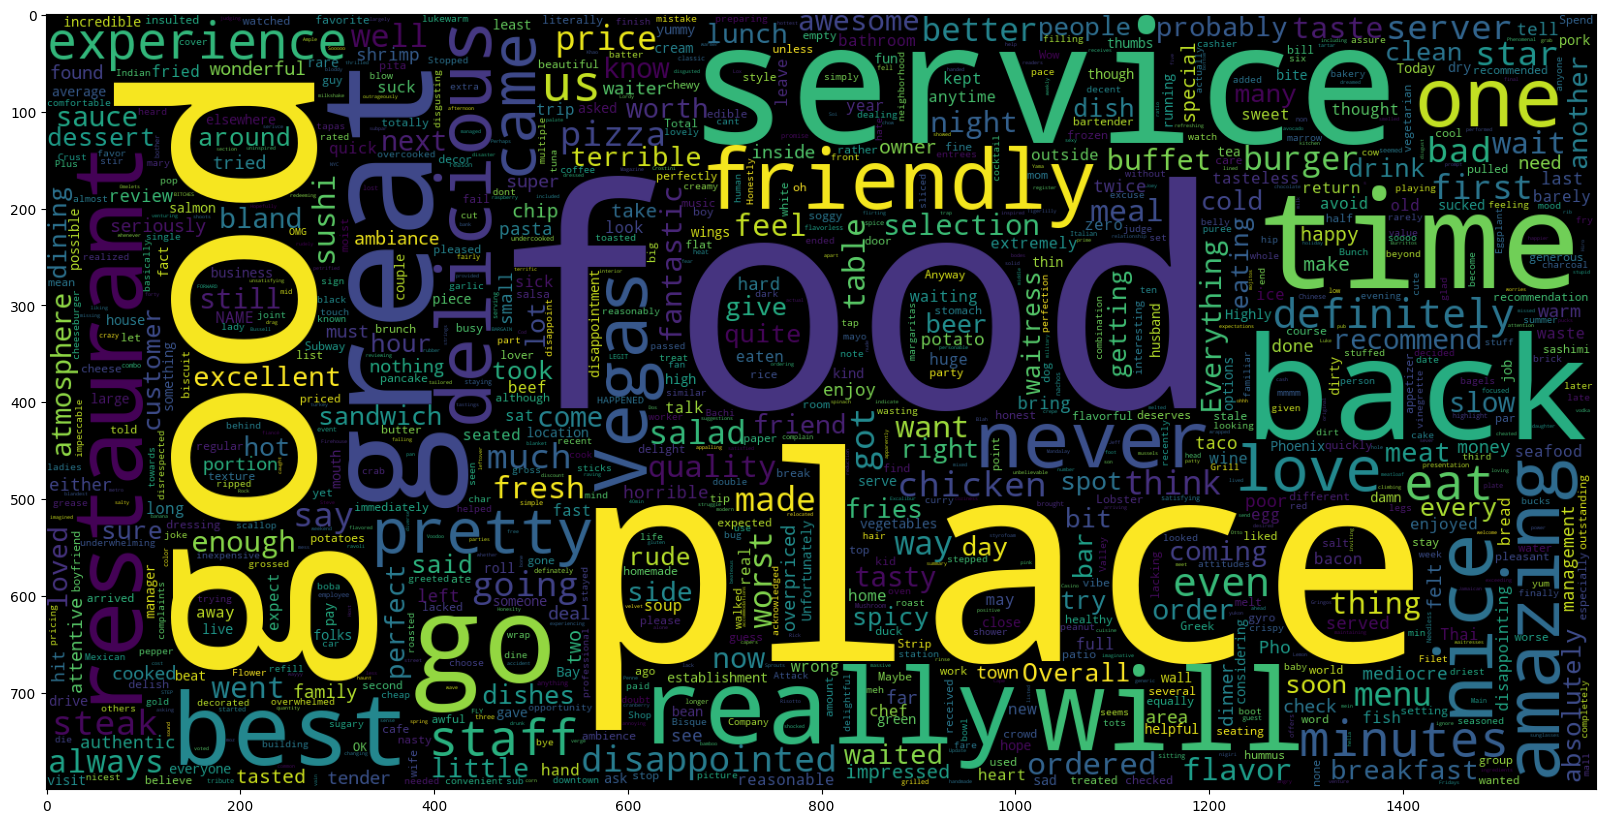

In [58]:
# Plot a cloud of words for negative reviews :
data_neg = data['cmd'][:800000] # selecting the positive reviews.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

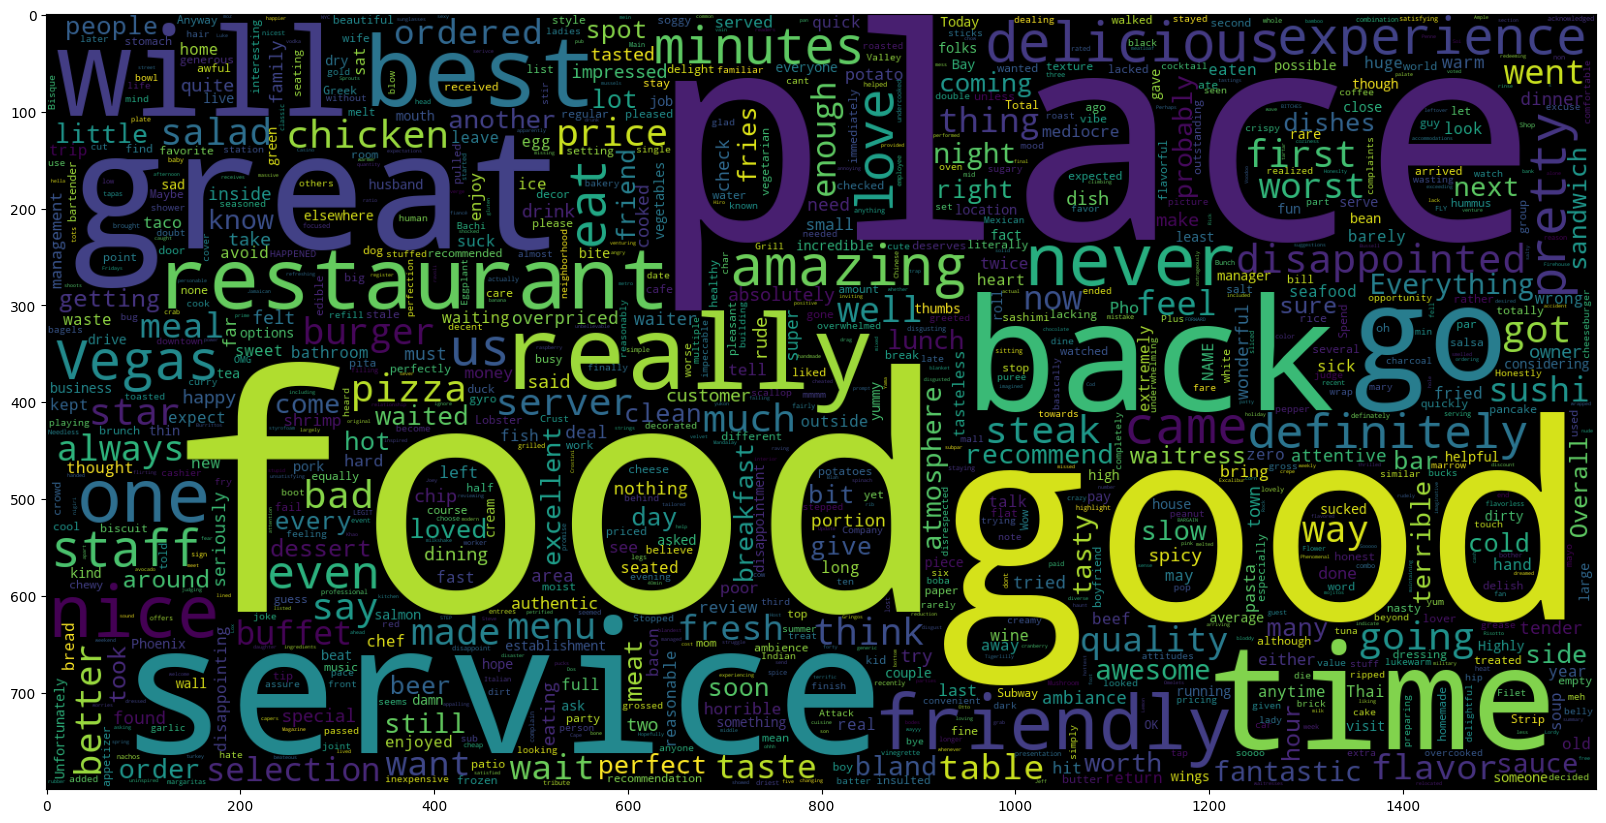

In [59]:
# selecting the positive reviews.
data_pos = data['cmd'][:800000] 
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)